In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("data_chg_rapid_all.csv")

In [4]:
df

,Chargingevent,CPID,Connector,StartDate,StartTime,EndDate,EndTime,StartDate_num,StartTime_num,EndDate_num,EndTime_num,duration,TotalkWh,Cost,Site,Group,Model,Model1,weekday,charger_id
0,4262365,50692,2,3/5/2018,11:54:59 PM,3/6/2018,12:00:59 AM,43164.0,23.92,43165.0,0.02,6.0,5,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4
1,4262362,50339,2,3/5/2018,11:38:59 PM,3/6/2018,12:39:59 AM,43164.0,23.65,43165.0,0.67,61.0,8,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2
2,4262354,50339,2,3/5/2018,11:20:59 PM,3/5/2018,11:25:59 PM,43164.0,23.35,43164.0,23.43,5.0,1,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2
3,4262349,50692,2,3/5/2018,10:48:59 PM,3/5/2018,11:27:00 PM,43164.0,22.82,43164.0,23.45,38.0,14,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4
4,4262341,50911,2,3/5/2018,10:32:00 PM,3/5/2018,10:59:00 PM,43164.0,22.53,43164.0,22.98,27.0,7,0.0,"Queen Street Car Park, Broughty Ferry, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865,7308625,51548,2,6/4/2018,2:36:00 AM,6/4/2018,3:05:59 AM,43255.0,2.60,43255.0,3.10,30.0,16,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7
8866,7308623,51547,2,6/4/2018,2:12:59 AM,6/4/2018,2:20:00 AM,43255.0,2.22,43255.0,2.33,7.0,3,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,6
8867,7308622,51549,2,6/4/2018,2:07:00 AM,6/4/2018,3:04:00 AM,43255.0,2.12,43255.0,3.07,57.0,27,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,8
8868,7308620,51548,2,6/4/2018,1:58:00 AM,6/4/2018,2:14:00 AM,43255.0,1.97,43255.0,2.23,16.0,12,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7


In [5]:
#Handling missing data
# Identifying missing values
missing_values = df.isnull().sum()

In [6]:
missing_values

Chargingevent    0
CPID             0
Connector        0
StartDate        0
StartTime        0
EndDate          0
EndTime          0
StartDate_num    0
StartTime_num    0
EndDate_num      0
EndTime_num      0
duration         0
TotalkWh         0
Cost             4
Site             0
Group            0
Model            0
Model1           0
weekday          0
charger_id       0
dtype: int64

In [7]:
# Handling missing data (e.g., imputation)
df['Cost'].fillna(df['Cost'].mean(), inplace=True)

# Alternatively, drop rows with missing values
df.dropna(inplace=True)


In [8]:
missing_values = df.isnull().sum()

In [9]:
missing_values

Chargingevent    0
CPID             0
Connector        0
StartDate        0
StartTime        0
EndDate          0
EndTime          0
StartDate_num    0
StartTime_num    0
EndDate_num      0
EndTime_num      0
duration         0
TotalkWh         0
Cost             0
Site             0
Group            0
Model            0
Model1           0
weekday          0
charger_id       0
dtype: int64

In [10]:
#Checking for duplicates

In [11]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]

In [12]:
duplicate_rows


,Chargingevent,CPID,Connector,StartDate,StartTime,EndDate,EndTime,StartDate_num,StartTime_num,EndDate_num,EndTime_num,duration,TotalkWh,Cost,Site,Group,Model,Model1,weekday,charger_id


In [13]:
## Drop duplicate rows
#df.drop_duplicates(inplace=True)

In [14]:
# Convert data types (e.g., converting a column to datetime)
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [15]:
df

,Chargingevent,CPID,Connector,StartDate,StartTime,EndDate,EndTime,StartDate_num,StartTime_num,EndDate_num,EndTime_num,duration,TotalkWh,Cost,Site,Group,Model,Model1,weekday,charger_id
0,4262365,50692,2,2018-03-05,11:54:59 PM,2018-03-06,12:00:59 AM,43164.0,23.92,43165.0,0.02,6.0,5,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4
1,4262362,50339,2,2018-03-05,11:38:59 PM,2018-03-06,12:39:59 AM,43164.0,23.65,43165.0,0.67,61.0,8,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2
2,4262354,50339,2,2018-03-05,11:20:59 PM,2018-03-05,11:25:59 PM,43164.0,23.35,43164.0,23.43,5.0,1,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2
3,4262349,50692,2,2018-03-05,10:48:59 PM,2018-03-05,11:27:00 PM,43164.0,22.82,43164.0,23.45,38.0,14,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4
4,4262341,50911,2,2018-03-05,10:32:00 PM,2018-03-05,10:59:00 PM,43164.0,22.53,43164.0,22.98,27.0,7,0.0,"Queen Street Car Park, Broughty Ferry, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865,7308625,51548,2,2018-06-04,2:36:00 AM,2018-06-04,3:05:59 AM,43255.0,2.60,43255.0,3.10,30.0,16,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7
8866,7308623,51547,2,2018-06-04,2:12:59 AM,2018-06-04,2:20:00 AM,43255.0,2.22,43255.0,2.33,7.0,3,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,6
8867,7308622,51549,2,2018-06-04,2:07:00 AM,2018-06-04,3:04:00 AM,43255.0,2.12,43255.0,3.07,57.0,27,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,8
8868,7308620,51548,2,2018-06-04,1:58:00 AM,2018-06-04,2:14:00 AM,43255.0,1.97,43255.0,2.23,16.0,12,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7


In [16]:
#Identifying Outliers

In [17]:
# Using Z-score method
from scipy import stats
z_scores_duration = stats.zscore(df['duration'])
z_scores_TotalkWh = stats.zscore(df['TotalkWh'])
outliers = (np.abs(z_scores_duration) > 3)
outliers1 = (np.abs(z_scores_TotalkWh) > 3)

In [18]:
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
8865    False
8866    False
8867    False
8868    False
8869    False
Name: duration, Length: 8870, dtype: bool

In [19]:
outliers1

0       False
1       False
2       False
3       False
4       False
        ...  
8865    False
8866    False
8867    False
8868    False
8869    False
Name: TotalkWh, Length: 8870, dtype: bool

In [20]:
df = df[~outliers]

In [21]:
df = df[~outliers1]

/var/folders/yj/4qlyp8n51nn_83qdhyf3yq5c0000gn/T/ipykernel_7016/1485347783.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers1]


In [22]:
df

,Chargingevent,CPID,Connector,StartDate,StartTime,EndDate,EndTime,StartDate_num,StartTime_num,EndDate_num,EndTime_num,duration,TotalkWh,Cost,Site,Group,Model,Model1,weekday,charger_id
0,4262365,50692,2,2018-03-05,11:54:59 PM,2018-03-06,12:00:59 AM,43164.0,23.92,43165.0,0.02,6.0,5,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4
1,4262362,50339,2,2018-03-05,11:38:59 PM,2018-03-06,12:39:59 AM,43164.0,23.65,43165.0,0.67,61.0,8,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2
2,4262354,50339,2,2018-03-05,11:20:59 PM,2018-03-05,11:25:59 PM,43164.0,23.35,43164.0,23.43,5.0,1,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2
3,4262349,50692,2,2018-03-05,10:48:59 PM,2018-03-05,11:27:00 PM,43164.0,22.82,43164.0,23.45,38.0,14,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4
4,4262341,50911,2,2018-03-05,10:32:00 PM,2018-03-05,10:59:00 PM,43164.0,22.53,43164.0,22.98,27.0,7,0.0,"Queen Street Car Park, Broughty Ferry, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865,7308625,51548,2,2018-06-04,2:36:00 AM,2018-06-04,3:05:59 AM,43255.0,2.60,43255.0,3.10,30.0,16,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7
8866,7308623,51547,2,2018-06-04,2:12:59 AM,2018-06-04,2:20:00 AM,43255.0,2.22,43255.0,2.33,7.0,3,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,6
8867,7308622,51549,2,2018-06-04,2:07:00 AM,2018-06-04,3:04:00 AM,43255.0,2.12,43255.0,3.07,57.0,27,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,8
8868,7308620,51548,2,2018-06-04,1:58:00 AM,2018-06-04,2:14:00 AM,43255.0,1.97,43255.0,2.23,16.0,12,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7


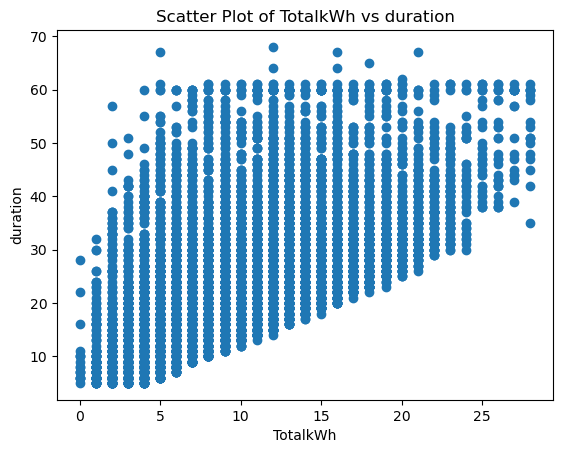

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['TotalkWh'], df['duration'])
plt.xlabel('TotalkWh')
plt.ylabel('duration')
plt.title('Scatter Plot of TotalkWh vs duration')
plt.show()


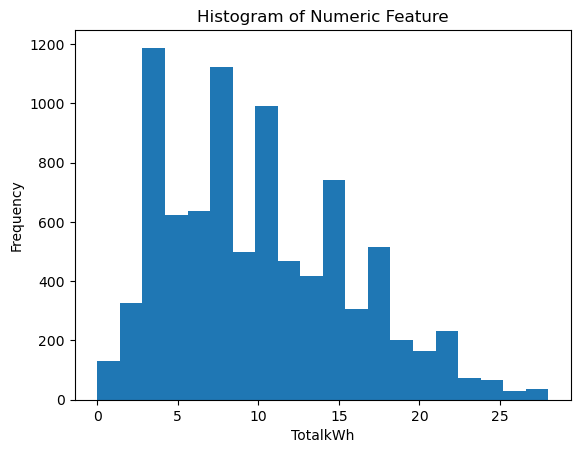

In [24]:
plt.hist(df['TotalkWh'], bins=20)
plt.xlabel('TotalkWh')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Feature')
plt.show()


/var/folders/yj/4qlyp8n51nn_83qdhyf3yq5c0000gn/T/ipykernel_7016/1715830039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


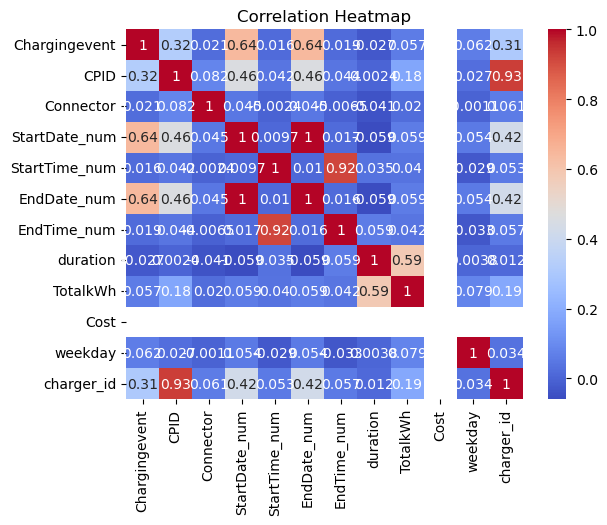

In [25]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Label Encoding for single column
label_encoder = LabelEncoder()
df['Site_encoded'] = label_encoder.fit_transform(df['Site'])
df['Model_encoded'] = label_encoder.fit_transform(df['Model'])
df['Group_encoded'] = label_encoder.fit_transform(df['Group'])


In [32]:
df

,Chargingevent,CPID,Connector,StartDate,StartTime,EndDate,EndTime,StartDate_num,StartTime_num,EndDate_num,...,Cost,Site,Group,Model,Model1,weekday,charger_id,Site_encoded,Model_encoded,Group_encoded
0,4262365,50692,2,2018-03-05,11:54:59 PM,2018-03-06,12:00:59 AM,43164.0,23.92,43165.0,...,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4,1,2,0
1,4262362,50339,2,2018-03-05,11:38:59 PM,2018-03-06,12:39:59 AM,43164.0,23.65,43165.0,...,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2,4,2,0
2,4262354,50339,2,2018-03-05,11:20:59 PM,2018-03-05,11:25:59 PM,43164.0,23.35,43164.0,...,0.0,"Public Works Dept, Clepington Rd. Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,2,4,2,0
3,4262349,50692,2,2018-03-05,10:48:59 PM,2018-03-05,11:27:00 PM,43164.0,22.82,43164.0,...,0.0,"Dundee Ice Arena, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,4,1,2,0
4,4262341,50911,2,2018-03-05,10:32:00 PM,2018-03-05,10:59:00 PM,43164.0,22.53,43164.0,...,0.0,"Queen Street Car Park, Broughty Ferry, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT Triple Rapid Charger,rapid,1,5,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865,7308625,51548,2,2018-06-04,2:36:00 AM,2018-06-04,3:05:59 AM,43255.0,2.60,43255.0,...,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7,3,0,0
8866,7308623,51547,2,2018-06-04,2:12:59 AM,2018-06-04,2:20:00 AM,43255.0,2.22,43255.0,...,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,6,3,0,0
8867,7308622,51549,2,2018-06-04,2:07:00 AM,2018-06-04,3:04:00 AM,43255.0,2.12,43255.0,...,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,8,3,0,0
8868,7308620,51548,2,2018-06-04,1:58:00 AM,2018-06-04,2:14:00 AM,43255.0,1.97,43255.0,...,0.0,"Lochee Charging Hub, Dundee",APT Controls; CYC; ChargePlace Scotland; Dunde...,APT 50kW Raption,rapid,1,7,3,0,0


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Nov 2, 2021
Code for charging station occupancy prediction using hybrid LSTM 
and Machine Learning approaches.
More detail: see the paper: 
Ma, TY, Faye, S. (2021) Multistep Electric Vehicle Charging Station Occupancy
 Prediction using Hybrid LSTM Neural Networks. arXiv:2106.04986
    
@author: Tai-yu MA
"""

import math
import time
import pandas as pd
import numpy  as np 
from numpy import array
from matplotlib import pyplot
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense,Dropout  
from keras.models import Model 
from keras.layers import Input
from keras.layers import concatenate

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
 
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


## read data for machine learning approaches
def read_data_ML(string):
    Z = pd.read_csv(string)
    Z=Z.to_numpy()
     
    Z.shape  
    n_train=int(0.7*len(Z))
    
    X_train=Z[0: n_train,0:-1];         y_train = Z[0:n_train,-1]
    X_test =Z[n_train: len(Z),0:-1];    y_test  = Z[n_train:len(Z),-1]
    X_train.shape
    X_test.shape 
    X_train[0,] 
    
    return X_train,y_train,X_test,y_test 


## read data for hybrid LSTM
def read_data(string,string2,model_id, n_steps_in,n_steps_out,n_features):
     
    Z = pd.read_csv(string)
    Z=Z.to_numpy()
     
    Z.shape 
    X, y = split_sequences(Z[:,3:5], n_steps_in, n_steps_out )
        #X, y = split_sequences(Z, n_steps_in, n_steps_out )
    
    n_train=int(0.7*len(X))
    Z1 = pd.read_csv(string2)#col1 weekday,col2 weekend
    Z1 = Z1.to_numpy()
    Z1 = Z1.transpose()
    Z2 =np.concatenate((Z1,Z1),axis=1) 
    X2 = np.zeros([len(Z),3+144],float)  
  
    for i in range(len(Z)-n_steps_in): 
     if Z[i+n_steps_in-1,-1]==0:      
       #  qq=np.array(Z2[0][Z[i+n_steps_in-1,0]:Z[i+n_steps_in-1,0]+n_steps_out])
          qq=np.array(Z2[0][0:144])
          X2[i]=np.append(Z[i+n_steps_in-1][0:3],qq) 
     else:            
        # qq=np.array(Z2[1][Z[i+n_steps_in-1,0]:Z[i+n_steps_in-1,0]+n_steps_out])
         qq=np.array(Z2[1][0:144])
         X2[i]=np.append(Z[i+n_steps_in-1][0:3],qq) 
    
    X_train=X[0: n_train,];         y_train = y[0:n_train,]
    X_test =X[n_train: len(X),];    y_test  = y[n_train:len(X),]
    X_train.shape
    X_test.shape 
    X_train[0,]
    X2_train=X2[0: n_train,]; X2_test =X2[n_train: len(X),];  
    X2_train.shape
    X2_test.shape
    X2_train[0,]  
    
    return X_train,y_train,X_test,y_test,X2_train,X2_test
 
    
############
# Mix_LSTM
##############
def fit_model_MixLSTM(res_F1,res ,_iter, X_train,y_train,X_test,y_test,X2_train,X2_test,
                   n_steps_in,n_steps_out,n_features, n_n_lstm,dropout,n_epoch,bat_size):
    
     
    input1 = keras.Input(shape=(n_steps_in, n_features))
    input2 = keras.Input(shape=(147,))  
    model_LSTM=LSTM(n_n_lstm)(input1)
    model_LSTM=Dropout(dropout)(model_LSTM)
    model_LSTM=Dense(18, activation='relu')(model_LSTM)
   
    meta_layer = keras.layers.Dense(147, activation="relu")(input2)
    meta_layer = keras.layers.Dense(64, activation="relu")(meta_layer)    
    meta_layer = keras.layers.Dense(32, activation="relu")(meta_layer)
    model_merge = keras.layers.concatenate([model_LSTM, meta_layer])
    model_merge = Dense(100, activation='relu')(model_merge)
    model_merge = Dropout(dropout)(model_merge)    
    output = Dense(n_steps_out, activation='sigmoid')(model_merge)
    model = Model(inputs=[input1, input2], outputs=output) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    keras.utils.plot_model(model, show_shapes=True)
    #print(model.summary()) 
    model.fit([X_train, X2_train], y_train, epochs=n_epoch, batch_size=bat_size,verbose=2)
    
    temp = model.predict([X_test,X2_test], verbose=2)
    m,n=temp.shape 
    t_target = n_steps_out
       
    yhat=np.zeros((m,t_target))
    y_obs=np.array(y_test[0:m,0:t_target])
    scores1= np.zeros(m)
    scores_F1= np.zeros([m,3],float)
    for i in np.arange(m):  
        for j in np.arange(t_target):  
            if temp[i][j]>=0.5:
                yhat[i][j]=1           
        val=1 - sum(abs(yhat[i,]-y_obs[i,:]))/t_target
        scores_F1[i,0] = precision_score(y_obs[i,:], yhat[i,],zero_division=1)
        scores_F1[i,1] = recall_score(y_obs[i,:], yhat[i,],zero_division=1)
        scores_F1[i,2] = f1_score(y_obs[i,:], yhat[i,],zero_division=1)
        scores1[i]=val       
     
    _mean1 = np.mean(scores1)      
    _mean_F1 = np.mean(scores_F1,axis=0)  
    res[_iter,:]=[ n_n_lstm,dropout,n_epoch, bat_size, _mean1 ]  
    res_F1[_iter,:]=_mean_F1
    return res_F1, res     

    
def run_ML(model_id,n_steps_out):
     
    n_station=9 
    string='/Users/varunkumarkonjeti/Downloads/3rd Year Final Project/EV/Multistep-Electric-Vehicle-Charging-Station-Occupancy-Prediction--main/mixed_LSTM/data_chg_'
    station=[string+'1.csv',string+'2.csv',string+'3.csv',string+'4.csv',string+'5.csv',string+'6.csv',string+'7.csv',string+'8.csv',string+'9.csv']

    if    model_id=='logistic': idx_model = LogisticRegression()
    elif  model_id=='svc':      idx_model = SVC()
    elif  model_id=='RF':       idx_model = RandomForestClassifier() 
    elif  model_id=='Ada':      idx_model = AdaBoostClassifier() 
    
    #models=[m_logit,m_KNN,m_SVC,m_RF,m_Bag,m_ada]
    models=[idx_model]
    rng_s_1=[s for s in range(3)]    
    rng_s_2=[s for s in range(6)]
    rng_s_3=[s for s in range(12)]
    rng_s_4=[s for s in range(24)]
    rng_s_5=[s for s in range(36)]
     
    step_set=[rng_s_1,rng_s_2,rng_s_3,rng_s_4,rng_s_5] 
    
    vec_mean_metrics=[]
    #res_all=[] # activate for one-step
    for s in range(n_station):         
        X_train,y_train,X_test,y_test =read_data_ML(station[s])
        res_all=[] #activate for multi-steps
        for mm in models:
            mm.fit(X_train, y_train)   
            # case n_step_out=1
            # predicted = mm.predict(X_test)    
            # _acc   =accuracy_score(y_test,predicted)
            # _pre   = precision_score(y_test,predicted)
            # _recall=recall_score(y_test,predicted)
            # _f1    = f1_score(y_test,predicted)
            # res_all.append([_acc, _pre,_recall,_f1])
            # mean_metrics = np.mean(res_all,axis=0)  
            #end case one step
           
            t_target = n_steps_out
            
            m,n=X_test.shape
            yhat=np.zeros([m,t_target])            
            y_obs=np.zeros([m,t_target])
            for kk in range(m-t_target) :
                y_obs[kk,:]=y_test[kk:kk+t_target]
                 
            scores1= np.zeros(m,float)
            scores_F1= np.zeros([m,3],float)            
            n_sample=m-n_steps_out     
            for i in range(n_sample): 
                X_test_temp=X_test.copy();  
                X_test_temp=np.append(X_test_temp,[[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],],0)#dummy
                for j in range(n_steps_out):   
                    temp11=X_test_temp[i+j,:].reshape(1, -1)                    
                    yhat[i,j] = mm.predict(temp11) 
                    #if i+j+3<m:
                    rng1=[ i+j+3 -_ii for _ii in range(0, 3) ]
                    rng2=[ _jj for _jj in range(-3,0) ] # only t-3,-2,-1 are considered
                    X_test_temp[rng1,rng2]=yhat[i,j]  
                  
                res_temp=[]
                for rr in step_set: 
                    _acc   = accuracy_score(y_obs[i,rr], yhat[i,rr])
                    _pre   =precision_score(y_obs[i,rr], yhat[i,rr],zero_division=1)
                    _recall= recall_score(y_obs[i,rr], yhat[i,rr],zero_division=1)
                    _f1    = f1_score(y_obs[i,rr], yhat[i,rr],zero_division=1)
                    res_temp=np.append(res_temp,[_acc, _pre,_recall,_f1],0)
                
                res_all.append(res_temp) 
                
            _mean_metrics = np.mean(res_all,axis=0)   
            vec_mean_metrics.append(_mean_metrics)
            
    return  vec_mean_metrics
    
def run(model_id, n_steps_in,n_steps_out,n_features,n_epoch,n_trivals,n_out,
            n_n_lstm,dropout,bat_size): 
     
    
    t_win=n_steps_in*n_steps_out        
    n_station=9
    string='/Users/varunkumarkonjeti/Downloads/3rd Year Final Project/EV/Multistep-Electric-Vehicle-Charging-Station-Occupancy-Prediction--main/mixed_LSTM/data_chg_'
    string2='/Users/varunkumarkonjeti/Downloads/3rd Year Final Project/EV/Multistep-Electric-Vehicle-Charging-Station-Occupancy-Prediction--main/mixed_LSTM/data_chg_pred_occ_t_'
    station=[string+'1.csv',string+'2.csv',string+'3.csv',string+'4.csv',string+'5.csv',string+'6.csv',string+'7.csv',string+'8.csv',string+'9.csv']
    station2=[string2+'1.csv',string2+'2.csv',string2+'3.csv',string2+'4.csv',string2+'5.csv',string2+'6.csv',string2+'7.csv',string2+'8.csv',string2+'9.csv']
  
    res_all=[];res_all_F1=[]
    for s in range(n_station):         
        X_train,y_train,X_test,y_test,X2_train,X2_test=read_data(station[s],station2[s],model_id,  
                                n_steps_in,n_steps_out,n_features)
        res=np.zeros([n_trivals,n_out])
        res_F1=np.zeros([n_trivals,3])
        X_train.shape
        y_train.shape 
        for _iter in range(n_trivals):   
            if model_id=='Mix_LSTM':
                 res_F1,res=fit_model_MixLSTM(res_F1,res,_iter, X_train,y_train,X_test,y_test,X2_train,X2_test, 
                           n_steps_in,n_steps_out,n_features, n_n_lstm,dropout,n_epoch,
                           bat_size)  
               
        _mean = np.mean(res[:,-1:],axis=0)
        _std  = np.std(res[:,-1:],axis=0)
        res_all.append([_mean,_std])
       
        _mean_F1 = np.mean(res_F1,axis=0)
        _std_F1  = np.std(res_F1 ,axis=0)
        res_all_F1.append([_mean_F1])
        
    temp=[];temp1=[]
    for i in range(n_station):            
        temp.append(res_all[i][0])     
        
    accuracy_avg1=np.mean(temp, axis=0)
    accuracy_avg2=np.mean(temp, axis=1) 
    avg_metrics_prec_recall_F1=np.mean(res_all_F1, axis=0)
    
    return accuracy_avg1, accuracy_avg2, res_all,res_all_F1,avg_metrics_prec_recall_F1


def main():
   
    n_steps_in =12  # input y sequence for LSTM cell
    n_features = 1  # one feature for the input of the LSTM cell
    n_steps_out =6# num of predicted steps. 
    n_epoch_global=15
    n_trivals=10
    n_out=5  
    n_n_lstm=36
    dropout=0.2
    bat_size= 30
    accuracy_avg_1=[]
    accuracy_avg_2=[]
    flag_sensitivity=0  
    model_id='Mix_LSTM' 
    flag_ML=0 # to run machine learning models, set  flag_ML=1 otherwise 0
    # for ML, we set n_steps_out=36 as we compute the predcition for all forecasting cases 
    if  flag_ML==1:
        n_steps_out=36
    #choose the ML model to test
    
    #model_id='logistic'
    #model_id='svc'
    #model_id='RF'
    #model_id='Ada'
    
    if flag_ML==0:
        if flag_sensitivity==1:
            parameter = [11,12] #,13,14,15,16,17,18,19,20
            for i in range(len(parameter)):
                avg1,avg2,res_all, res_all_F1=  run(model_id,n_steps_in,n_steps_out,n_features,
                               parameter[i],n_trivals,n_out,n_n_lstm,dropout,bat_size)  
                accuracy_avg_1.append(avg1)
                accuracy_avg_2.append(avg2)            
        else:   
            avg1,avg2,res_all, res_all_F1, avg_metrics_prec_recall_F1=  run(model_id,n_steps_in,n_steps_out,n_features,
                                n_epoch_global,n_trivals,n_out,n_n_lstm,dropout,bat_size)  
            accuracy_avg_1.append(avg1)
            accuracy_avg_2.append(avg2) 
            
        print('model: ', model_id)
        print('sensitivity_flag = ', flag_sensitivity) 
        if flag_sensitivity==1:
            print('parameter : ', parameter) 
        print('n_step out: ', n_steps_out)
        print('n_epoch,n_trivals, n_n_lstm,dropout,bat_size', 
              n_epoch_global,n_trivals,n_n_lstm,dropout,bat_size)       
        print('accuracy_avg_1: ',accuracy_avg_1)
        print('accuracy_avg_2: ',accuracy_avg_2)
        print('avg_metrics_prec_recall_F1= ',avg_metrics_prec_recall_F1)
       
    else:        
        vec_mean_metrics = run_ML(model_id,n_steps_out)
        
        mean_all  = np.mean(vec_mean_metrics,axis=0)
        print('vec_mean_metrics',vec_mean_metrics)
        print('_mean_all',mean_all)

main() 

Epoch 1/15
205/205 - 1s - loss: 0.2608 - accuracy: 0.1380 - 933ms/epoch - 5ms/step
Epoch 2/15
205/205 - 0s - loss: 0.1786 - accuracy: 0.0952 - 375ms/epoch - 2ms/step
Epoch 3/15
205/205 - 0s - loss: 0.1717 - accuracy: 0.0924 - 373ms/epoch - 2ms/step
Epoch 4/15
205/205 - 0s - loss: 0.1689 - accuracy: 0.0887 - 372ms/epoch - 2ms/step
Epoch 5/15
205/205 - 0s - loss: 0.1661 - accuracy: 0.0862 - 374ms/epoch - 2ms/step
Epoch 6/15
205/205 - 0s - loss: 0.1645 - accuracy: 0.0911 - 376ms/epoch - 2ms/step
Epoch 7/15
205/205 - 0s - loss: 0.1624 - accuracy: 0.0895 - 374ms/epoch - 2ms/step
Epoch 8/15
205/205 - 0s - loss: 0.1659 - accuracy: 0.0880 - 377ms/epoch - 2ms/step
Epoch 9/15
205/205 - 0s - loss: 0.1627 - accuracy: 0.0877 - 374ms/epoch - 2ms/step
Epoch 10/15
205/205 - 0s - loss: 0.1595 - accuracy: 0.0885 - 375ms/epoch - 2ms/step
Epoch 11/15
205/205 - 0s - loss: 0.1572 - accuracy: 0.0878 - 375ms/epoch - 2ms/step
Epoch 12/15
205/205 - 0s - loss: 0.1574 - accuracy: 0.0875 - 377ms/epoch - 2ms/step
E

Epoch 7/15
205/205 - 0s - loss: 0.1615 - accuracy: 0.0875 - 382ms/epoch - 2ms/step
Epoch 8/15
205/205 - 0s - loss: 0.1622 - accuracy: 0.0898 - 375ms/epoch - 2ms/step
Epoch 9/15
205/205 - 0s - loss: 0.1600 - accuracy: 0.0888 - 376ms/epoch - 2ms/step
Epoch 10/15
205/205 - 0s - loss: 0.1591 - accuracy: 0.0875 - 376ms/epoch - 2ms/step
Epoch 11/15
205/205 - 0s - loss: 0.1601 - accuracy: 0.0865 - 375ms/epoch - 2ms/step
Epoch 12/15
205/205 - 0s - loss: 0.1594 - accuracy: 0.0860 - 376ms/epoch - 2ms/step
Epoch 13/15
205/205 - 0s - loss: 0.1581 - accuracy: 0.0854 - 374ms/epoch - 2ms/step
Epoch 14/15
205/205 - 0s - loss: 0.1573 - accuracy: 0.0900 - 375ms/epoch - 2ms/step
Epoch 15/15
205/205 - 0s - loss: 0.1602 - accuracy: 0.0874 - 375ms/epoch - 2ms/step
83/83 - 0s - 164ms/epoch - 2ms/step
Epoch 1/15
205/205 - 1s - loss: 0.2611 - accuracy: 0.1268 - 918ms/epoch - 4ms/step
Epoch 2/15
205/205 - 0s - loss: 0.1832 - accuracy: 0.0965 - 375ms/epoch - 2ms/step
Epoch 3/15
205/205 - 0s - loss: 0.1719 - accu

Epoch 13/15
306/306 - 1s - loss: 0.3582 - accuracy: 0.2544 - 606ms/epoch - 2ms/step
Epoch 14/15
306/306 - 1s - loss: 0.3586 - accuracy: 0.2524 - 615ms/epoch - 2ms/step
Epoch 15/15
306/306 - 1s - loss: 0.3580 - accuracy: 0.2544 - 610ms/epoch - 2ms/step
123/123 - 0s - 201ms/epoch - 2ms/step
Epoch 1/15
306/306 - 1s - loss: 0.4292 - accuracy: 0.2157 - 1s/epoch - 4ms/step
Epoch 2/15
306/306 - 1s - loss: 0.3712 - accuracy: 0.2525 - 559ms/epoch - 2ms/step
Epoch 3/15
306/306 - 1s - loss: 0.3675 - accuracy: 0.2534 - 563ms/epoch - 2ms/step
Epoch 4/15
306/306 - 1s - loss: 0.3653 - accuracy: 0.2548 - 564ms/epoch - 2ms/step
Epoch 5/15
306/306 - 1s - loss: 0.3637 - accuracy: 0.2511 - 563ms/epoch - 2ms/step
Epoch 6/15
306/306 - 1s - loss: 0.3631 - accuracy: 0.2535 - 563ms/epoch - 2ms/step
Epoch 7/15
306/306 - 1s - loss: 0.3614 - accuracy: 0.2555 - 565ms/epoch - 2ms/step
Epoch 8/15
306/306 - 1s - loss: 0.3603 - accuracy: 0.2519 - 564ms/epoch - 2ms/step
Epoch 9/15
306/306 - 1s - loss: 0.3594 - accuracy

Epoch 4/15
306/306 - 1s - loss: 0.3673 - accuracy: 0.2544 - 580ms/epoch - 2ms/step
Epoch 5/15
306/306 - 1s - loss: 0.3650 - accuracy: 0.2533 - 617ms/epoch - 2ms/step
Epoch 6/15
306/306 - 1s - loss: 0.3632 - accuracy: 0.2549 - 578ms/epoch - 2ms/step
Epoch 7/15
306/306 - 1s - loss: 0.3630 - accuracy: 0.2543 - 583ms/epoch - 2ms/step
Epoch 8/15
306/306 - 1s - loss: 0.3615 - accuracy: 0.2523 - 593ms/epoch - 2ms/step
Epoch 9/15
306/306 - 1s - loss: 0.3598 - accuracy: 0.2533 - 596ms/epoch - 2ms/step
Epoch 10/15
306/306 - 1s - loss: 0.3596 - accuracy: 0.2544 - 607ms/epoch - 2ms/step
Epoch 11/15
306/306 - 1s - loss: 0.3575 - accuracy: 0.2550 - 603ms/epoch - 2ms/step
Epoch 12/15
306/306 - 1s - loss: 0.3584 - accuracy: 0.2528 - 604ms/epoch - 2ms/step
Epoch 13/15
306/306 - 1s - loss: 0.3585 - accuracy: 0.2558 - 601ms/epoch - 2ms/step
Epoch 14/15
306/306 - 1s - loss: 0.3590 - accuracy: 0.2529 - 603ms/epoch - 2ms/step
Epoch 15/15
306/306 - 1s - loss: 0.3584 - accuracy: 0.2534 - 602ms/epoch - 2ms/ste

Epoch 10/15
296/296 - 1s - loss: 0.4141 - accuracy: 0.3222 - 553ms/epoch - 2ms/step
Epoch 11/15
296/296 - 1s - loss: 0.4154 - accuracy: 0.3223 - 552ms/epoch - 2ms/step
Epoch 12/15
296/296 - 1s - loss: 0.4148 - accuracy: 0.3249 - 554ms/epoch - 2ms/step
Epoch 13/15
296/296 - 1s - loss: 0.4129 - accuracy: 0.3205 - 556ms/epoch - 2ms/step
Epoch 14/15
296/296 - 1s - loss: 0.4121 - accuracy: 0.3246 - 558ms/epoch - 2ms/step
Epoch 15/15
296/296 - 1s - loss: 0.4127 - accuracy: 0.3217 - 568ms/epoch - 2ms/step
119/119 - 0s - 199ms/epoch - 2ms/step
Epoch 1/15
296/296 - 1s - loss: 0.4828 - accuracy: 0.2799 - 1s/epoch - 4ms/step
Epoch 2/15
296/296 - 1s - loss: 0.4320 - accuracy: 0.3228 - 598ms/epoch - 2ms/step
Epoch 3/15
296/296 - 1s - loss: 0.4269 - accuracy: 0.3235 - 558ms/epoch - 2ms/step
Epoch 4/15
296/296 - 1s - loss: 0.4228 - accuracy: 0.3232 - 557ms/epoch - 2ms/step
Epoch 5/15
296/296 - 1s - loss: 0.4222 - accuracy: 0.3230 - 558ms/epoch - 2ms/step
Epoch 6/15
296/296 - 1s - loss: 0.4191 - accur

120/120 - 0s - 192ms/epoch - 2ms/step
Epoch 1/15
299/299 - 1s - loss: 0.5149 - accuracy: 0.4317 - 1s/epoch - 4ms/step
Epoch 2/15
299/299 - 1s - loss: 0.4685 - accuracy: 0.4836 - 592ms/epoch - 2ms/step
Epoch 3/15
299/299 - 1s - loss: 0.4627 - accuracy: 0.4834 - 576ms/epoch - 2ms/step
Epoch 4/15
299/299 - 1s - loss: 0.4600 - accuracy: 0.4805 - 561ms/epoch - 2ms/step
Epoch 5/15
299/299 - 1s - loss: 0.4575 - accuracy: 0.4791 - 559ms/epoch - 2ms/step
Epoch 6/15
299/299 - 1s - loss: 0.4546 - accuracy: 0.4811 - 564ms/epoch - 2ms/step
Epoch 7/15
299/299 - 1s - loss: 0.4539 - accuracy: 0.4790 - 560ms/epoch - 2ms/step
Epoch 8/15
299/299 - 1s - loss: 0.4526 - accuracy: 0.4801 - 566ms/epoch - 2ms/step
Epoch 9/15
299/299 - 1s - loss: 0.4517 - accuracy: 0.4824 - 564ms/epoch - 2ms/step
Epoch 10/15
299/299 - 1s - loss: 0.4501 - accuracy: 0.4809 - 584ms/epoch - 2ms/step
Epoch 11/15
299/299 - 1s - loss: 0.4513 - accuracy: 0.4815 - 580ms/epoch - 2ms/step
Epoch 12/15
299/299 - 1s - loss: 0.4495 - accuracy

Epoch 7/15
299/299 - 1s - loss: 0.4540 - accuracy: 0.4834 - 565ms/epoch - 2ms/step
Epoch 8/15
299/299 - 1s - loss: 0.4521 - accuracy: 0.4794 - 570ms/epoch - 2ms/step
Epoch 9/15
299/299 - 1s - loss: 0.4511 - accuracy: 0.4794 - 587ms/epoch - 2ms/step
Epoch 10/15
299/299 - 1s - loss: 0.4504 - accuracy: 0.4821 - 589ms/epoch - 2ms/step
Epoch 11/15
299/299 - 1s - loss: 0.4500 - accuracy: 0.4794 - 612ms/epoch - 2ms/step
Epoch 12/15
299/299 - 1s - loss: 0.4475 - accuracy: 0.4806 - 594ms/epoch - 2ms/step
Epoch 13/15
299/299 - 1s - loss: 0.4478 - accuracy: 0.4788 - 592ms/epoch - 2ms/step
Epoch 14/15
299/299 - 1s - loss: 0.4472 - accuracy: 0.4806 - 595ms/epoch - 2ms/step
Epoch 15/15
299/299 - 1s - loss: 0.4459 - accuracy: 0.4809 - 605ms/epoch - 2ms/step
120/120 - 0s - 220ms/epoch - 2ms/step
Epoch 1/15
299/299 - 1s - loss: 0.5259 - accuracy: 0.4154 - 1s/epoch - 4ms/step
Epoch 2/15
299/299 - 1s - loss: 0.4697 - accuracy: 0.4788 - 597ms/epoch - 2ms/step
Epoch 3/15
299/299 - 1s - loss: 0.4635 - accur

Epoch 13/15
306/306 - 1s - loss: 0.4312 - accuracy: 0.4472 - 587ms/epoch - 2ms/step
Epoch 14/15
306/306 - 1s - loss: 0.4310 - accuracy: 0.4448 - 584ms/epoch - 2ms/step
Epoch 15/15
306/306 - 1s - loss: 0.4313 - accuracy: 0.4486 - 589ms/epoch - 2ms/step
123/123 - 0s - 214ms/epoch - 2ms/step
Epoch 1/15
306/306 - 1s - loss: 0.5172 - accuracy: 0.3741 - 1s/epoch - 4ms/step
Epoch 2/15
306/306 - 1s - loss: 0.4517 - accuracy: 0.4465 - 582ms/epoch - 2ms/step
Epoch 3/15
306/306 - 1s - loss: 0.4441 - accuracy: 0.4479 - 569ms/epoch - 2ms/step
Epoch 4/15
306/306 - 1s - loss: 0.4429 - accuracy: 0.4464 - 575ms/epoch - 2ms/step
Epoch 5/15
306/306 - 1s - loss: 0.4393 - accuracy: 0.4437 - 573ms/epoch - 2ms/step
Epoch 6/15
306/306 - 1s - loss: 0.4377 - accuracy: 0.4463 - 560ms/epoch - 2ms/step
Epoch 7/15
306/306 - 1s - loss: 0.4377 - accuracy: 0.4456 - 556ms/epoch - 2ms/step
Epoch 8/15
306/306 - 1s - loss: 0.4354 - accuracy: 0.4455 - 563ms/epoch - 2ms/step
Epoch 9/15
306/306 - 1s - loss: 0.4353 - accuracy

Epoch 4/15
198/198 - 0s - loss: 0.4927 - accuracy: 0.4699 - 392ms/epoch - 2ms/step
Epoch 5/15
198/198 - 0s - loss: 0.4932 - accuracy: 0.4719 - 392ms/epoch - 2ms/step
Epoch 6/15
198/198 - 0s - loss: 0.4901 - accuracy: 0.4701 - 389ms/epoch - 2ms/step
Epoch 7/15
198/198 - 0s - loss: 0.4876 - accuracy: 0.4713 - 391ms/epoch - 2ms/step
Epoch 8/15
198/198 - 0s - loss: 0.4867 - accuracy: 0.4672 - 393ms/epoch - 2ms/step
Epoch 9/15
198/198 - 0s - loss: 0.4846 - accuracy: 0.4723 - 394ms/epoch - 2ms/step
Epoch 10/15
198/198 - 0s - loss: 0.4831 - accuracy: 0.4718 - 388ms/epoch - 2ms/step
Epoch 11/15
198/198 - 0s - loss: 0.4820 - accuracy: 0.4682 - 377ms/epoch - 2ms/step
Epoch 12/15
198/198 - 0s - loss: 0.4812 - accuracy: 0.4698 - 376ms/epoch - 2ms/step
Epoch 13/15
198/198 - 0s - loss: 0.4785 - accuracy: 0.4669 - 373ms/epoch - 2ms/step
Epoch 14/15
198/198 - 0s - loss: 0.4775 - accuracy: 0.4681 - 372ms/epoch - 2ms/step
Epoch 15/15
198/198 - 0s - loss: 0.4781 - accuracy: 0.4662 - 377ms/epoch - 2ms/ste

Epoch 10/15
198/198 - 0s - loss: 0.4826 - accuracy: 0.4696 - 376ms/epoch - 2ms/step
Epoch 11/15
198/198 - 0s - loss: 0.4815 - accuracy: 0.4684 - 377ms/epoch - 2ms/step
Epoch 12/15
198/198 - 0s - loss: 0.4802 - accuracy: 0.4686 - 371ms/epoch - 2ms/step
Epoch 13/15
198/198 - 0s - loss: 0.4798 - accuracy: 0.4674 - 375ms/epoch - 2ms/step
Epoch 14/15
198/198 - 0s - loss: 0.4774 - accuracy: 0.4684 - 376ms/epoch - 2ms/step
Epoch 15/15
198/198 - 0s - loss: 0.4776 - accuracy: 0.4689 - 374ms/epoch - 2ms/step
80/80 - 0s - 175ms/epoch - 2ms/step
Epoch 1/15
198/198 - 1s - loss: 0.5701 - accuracy: 0.3589 - 1s/epoch - 5ms/step
Epoch 2/15
198/198 - 0s - loss: 0.5018 - accuracy: 0.4728 - 390ms/epoch - 2ms/step
Epoch 3/15
198/198 - 0s - loss: 0.4945 - accuracy: 0.4721 - 389ms/epoch - 2ms/step
Epoch 4/15
198/198 - 0s - loss: 0.4913 - accuracy: 0.4757 - 386ms/epoch - 2ms/step
Epoch 5/15
198/198 - 0s - loss: 0.4888 - accuracy: 0.4686 - 387ms/epoch - 2ms/step
Epoch 6/15
198/198 - 0s - loss: 0.4864 - accurac

80/80 - 0s - 173ms/epoch - 2ms/step
Epoch 1/15
198/198 - 1s - loss: 0.5874 - accuracy: 0.4040 - 974ms/epoch - 5ms/step
Epoch 2/15
198/198 - 0s - loss: 0.5167 - accuracy: 0.5439 - 390ms/epoch - 2ms/step
Epoch 3/15
198/198 - 0s - loss: 0.5093 - accuracy: 0.5407 - 394ms/epoch - 2ms/step
Epoch 4/15
198/198 - 0s - loss: 0.5058 - accuracy: 0.5454 - 389ms/epoch - 2ms/step
Epoch 5/15
198/198 - 0s - loss: 0.5035 - accuracy: 0.5414 - 390ms/epoch - 2ms/step
Epoch 6/15
198/198 - 0s - loss: 0.5014 - accuracy: 0.5410 - 396ms/epoch - 2ms/step
Epoch 7/15
198/198 - 0s - loss: 0.4983 - accuracy: 0.5380 - 392ms/epoch - 2ms/step
Epoch 8/15
198/198 - 0s - loss: 0.4958 - accuracy: 0.5434 - 395ms/epoch - 2ms/step
Epoch 9/15
198/198 - 0s - loss: 0.4962 - accuracy: 0.5442 - 389ms/epoch - 2ms/step
Epoch 10/15
198/198 - 0s - loss: 0.4958 - accuracy: 0.5436 - 392ms/epoch - 2ms/step
Epoch 11/15
198/198 - 0s - loss: 0.4907 - accuracy: 0.5437 - 393ms/epoch - 2ms/step
Epoch 12/15
198/198 - 0s - loss: 0.4893 - accurac

Epoch 7/15
198/198 - 0s - loss: 0.4421 - accuracy: 0.3847 - 397ms/epoch - 2ms/step
Epoch 8/15
198/198 - 0s - loss: 0.4408 - accuracy: 0.3867 - 390ms/epoch - 2ms/step
Epoch 9/15
198/198 - 0s - loss: 0.4379 - accuracy: 0.3850 - 390ms/epoch - 2ms/step
Epoch 10/15
198/198 - 0s - loss: 0.4360 - accuracy: 0.3857 - 389ms/epoch - 2ms/step
Epoch 11/15
198/198 - 0s - loss: 0.4366 - accuracy: 0.3889 - 389ms/epoch - 2ms/step
Epoch 12/15
198/198 - 0s - loss: 0.4336 - accuracy: 0.3860 - 394ms/epoch - 2ms/step
Epoch 13/15
198/198 - 0s - loss: 0.4338 - accuracy: 0.3843 - 395ms/epoch - 2ms/step
Epoch 14/15
198/198 - 0s - loss: 0.4314 - accuracy: 0.3872 - 394ms/epoch - 2ms/step
Epoch 15/15
198/198 - 0s - loss: 0.4295 - accuracy: 0.3880 - 394ms/epoch - 2ms/step
80/80 - 0s - 173ms/epoch - 2ms/step
Epoch 1/15
198/198 - 1s - loss: 0.5107 - accuracy: 0.3282 - 954ms/epoch - 5ms/step
Epoch 2/15
198/198 - 0s - loss: 0.4619 - accuracy: 0.3909 - 388ms/epoch - 2ms/step
Epoch 3/15
198/198 - 0s - loss: 0.4561 - accu

Epoch 13/15
198/198 - 0s - loss: 0.4323 - accuracy: 0.3877 - 386ms/epoch - 2ms/step
Epoch 14/15
198/198 - 0s - loss: 0.4294 - accuracy: 0.3867 - 388ms/epoch - 2ms/step
Epoch 15/15
198/198 - 0s - loss: 0.4292 - accuracy: 0.3853 - 388ms/epoch - 2ms/step
80/80 - 1s - 856ms/epoch - 11ms/step
Epoch 1/15
198/198 - 1s - loss: 0.5379 - accuracy: 0.3456 - 941ms/epoch - 5ms/step
Epoch 2/15
198/198 - 0s - loss: 0.4615 - accuracy: 0.3904 - 390ms/epoch - 2ms/step
Epoch 3/15
198/198 - 0s - loss: 0.4588 - accuracy: 0.3907 - 387ms/epoch - 2ms/step
Epoch 4/15
198/198 - 0s - loss: 0.4518 - accuracy: 0.3917 - 386ms/epoch - 2ms/step
Epoch 5/15
198/198 - 0s - loss: 0.4462 - accuracy: 0.3904 - 387ms/epoch - 2ms/step
Epoch 6/15
198/198 - 0s - loss: 0.4423 - accuracy: 0.3906 - 390ms/epoch - 2ms/step
Epoch 7/15
198/198 - 0s - loss: 0.4413 - accuracy: 0.3867 - 388ms/epoch - 2ms/step
Epoch 8/15
198/198 - 0s - loss: 0.4387 - accuracy: 0.3885 - 387ms/epoch - 2ms/step
Epoch 9/15
198/198 - 0s - loss: 0.4353 - accura

Epoch 4/15
198/198 - 0s - loss: 0.3868 - accuracy: 0.2935 - 388ms/epoch - 2ms/step
Epoch 5/15
198/198 - 0s - loss: 0.3842 - accuracy: 0.2903 - 386ms/epoch - 2ms/step
Epoch 6/15
198/198 - 0s - loss: 0.3790 - accuracy: 0.2874 - 385ms/epoch - 2ms/step
Epoch 7/15
198/198 - 0s - loss: 0.3771 - accuracy: 0.2886 - 387ms/epoch - 2ms/step
Epoch 8/15
198/198 - 0s - loss: 0.3752 - accuracy: 0.2903 - 384ms/epoch - 2ms/step
Epoch 9/15
198/198 - 0s - loss: 0.3695 - accuracy: 0.2912 - 385ms/epoch - 2ms/step
Epoch 10/15
198/198 - 0s - loss: 0.3736 - accuracy: 0.2932 - 386ms/epoch - 2ms/step
Epoch 11/15
198/198 - 0s - loss: 0.3698 - accuracy: 0.2903 - 385ms/epoch - 2ms/step
Epoch 12/15
198/198 - 0s - loss: 0.3704 - accuracy: 0.2901 - 384ms/epoch - 2ms/step
Epoch 13/15
198/198 - 0s - loss: 0.3663 - accuracy: 0.2896 - 387ms/epoch - 2ms/step
Epoch 14/15
198/198 - 0s - loss: 0.3674 - accuracy: 0.2871 - 385ms/epoch - 2ms/step
Epoch 15/15
198/198 - 0s - loss: 0.3663 - accuracy: 0.2868 - 383ms/epoch - 2ms/ste

Epoch 10/15
198/198 - 0s - loss: 0.3718 - accuracy: 0.2905 - 383ms/epoch - 2ms/step
Epoch 11/15
198/198 - 0s - loss: 0.3717 - accuracy: 0.2910 - 384ms/epoch - 2ms/step
Epoch 12/15
198/198 - 0s - loss: 0.3679 - accuracy: 0.2886 - 384ms/epoch - 2ms/step
Epoch 13/15
198/198 - 0s - loss: 0.3667 - accuracy: 0.2903 - 387ms/epoch - 2ms/step
Epoch 14/15
198/198 - 0s - loss: 0.3659 - accuracy: 0.2880 - 384ms/epoch - 2ms/step
Epoch 15/15
198/198 - 0s - loss: 0.3641 - accuracy: 0.2871 - 386ms/epoch - 2ms/step
80/80 - 0s - 168ms/epoch - 2ms/step
model:  Mix_LSTM
sensitivity_flag =  0
n_step out:  6
n_epoch,n_trivals, n_n_lstm,dropout,bat_size 15 10 36 0.2 30
accuracy_avg_1:  [array([0.81956304])]
accuracy_avg_2:  [array([0.9661979 , 0.91786351, 0.86759723, 0.81046875, 0.76521093,
       0.73493187, 0.75079927, 0.75643999, 0.80655791])]
avg_metrics_prec_recall_F1=  [[0.88911328 0.79200922 0.73647615]]


In [2]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
